In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
import numpy as np
import skimage.io as io

In [153]:
import dataloader as data
# from dataloader import load_nosepoint, reag_img_part1

In [154]:
# get_gender(30)

In [155]:
# data.load_nosepoint(person_idx=30, viewpt_idx=1)

In [156]:
# data.read_img_part1(1, 1)

In [157]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = {}
for person_index in range(1,32+1):
    for viewpt_index in range(1,6+1):
        nose_point = data.load_nosepoint(person_index, viewpt_index)
        img = data.read_img_part1(person_index, viewpt_index)
        key = (person_index, viewpt_index)
        value = (img, nose_point)
        training_set[key] = value

assert len(training_set.items()) == 192, len(training_set.items())

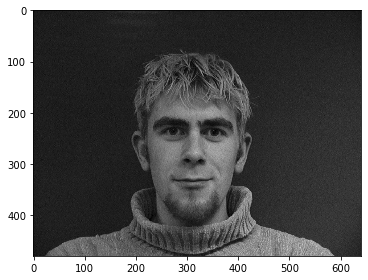

In [158]:
io.imshow(training_set[(1, 1)][0])

In [168]:
import skimage.transform
def data_augmentation_part1(img:np.ndarray, nose_point):
    my_types.assert_img_type(img)
    my_types.assert_is_point(nose_point)
    
    img = skimage.transform.resize(img, output_shape=(80, 60), preserve_range=True)
    my_types.assert_img_type(img)
    img = img - 0.5 # normalize values to range [-0.5, 0.5]
    
#     my_types.assert_img_type(img)
    return img

img = training_set[(1, 1)][0]
data_augmentation_part1(img, np.array([0, 0]))

array([[-0.40064557, -0.39722764, -0.39266334, ..., -0.38679608,
        -0.39256307, -0.39768844],
       [-0.39940523, -0.39402717, -0.38769065, ..., -0.38425353,
        -0.38878039, -0.39350779],
       [-0.39684079, -0.39062183, -0.38466566, ..., -0.38150207,
        -0.38690572, -0.38990047],
       ...,
       [-0.40174685, -0.39564383, -0.38659592, ..., -0.31849497,
        -0.3314447 , -0.34373104],
       [-0.40575806, -0.39892288, -0.34632875, ..., -0.32404892,
        -0.33765629, -0.34904642],
       [-0.41089871, -0.39913165, -0.28385693, ..., -0.33127451,
        -0.34323512, -0.35475211]])

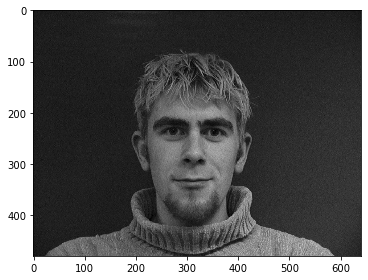

In [169]:
io.imshow(img)

In [164]:
# import my_types
# a = np.array([0, 0])
# a.shape
# my_types.assert_is_point(a)

True

In [ ]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = {}
for person_index in range(33,40+1):
    for viewpt_index in range(1,6+1):
        nose_point = data.load_nosepoint(person_index, viewpt_index)
        img = data.read_img_part1(person_index, viewpt_index)
        key = (person_index - 33 + 1, viewpt_index)
        value = (img, nose_point)
        validation_set[key] = value

assert len(validation_set.items()) == 48, len(validation_set.items())

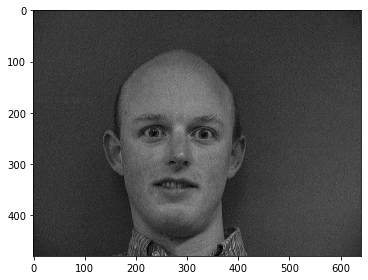

In [131]:
# import matplotlib.pyplot as plt
# plt.imshow(validation_set[(1, 1)][0], cmap='gray')
# io.imshow(validation_set[(1, 1)][0])